# Building a CDS Survival Curve

Understand what a CDS survival curve is

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.products.credit import *
from financepy.products.libor import *
from financepy.finutils import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  22 Sep 2020 at 22:40 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



## Build Libor Curve

In [4]:
settlementDate = FinDate(2018, 12, 20)

In [5]:
dcType = FinDayCountTypes.ACT_360
depo1 = FinLiborDeposit(settlementDate, "1M", 0.022009, dcType)
depo2 = FinLiborDeposit(settlementDate, "2M", 0.022138, dcType)
depo3 = FinLiborDeposit(settlementDate, "3M", 0.021810, dcType)
depo4 = FinLiborDeposit(settlementDate, "6M", 0.020503, dcType)
depo5 = FinLiborDeposit(settlementDate, "12M", 0.019930, dcType)
depos = [depo1,depo2,depo3,depo4,depo5]

swapType = FinLiborSwapTypes.PAYER
dcType = FinDayCountTypes.THIRTY_E_360_ISDA
fixedFreq = FinFrequencyTypes.SEMI_ANNUAL
swap1 = FinLiborSwap(settlementDate,"2Y",swapType,0.015910,fixedFreq,dcType)
swap2 = FinLiborSwap(settlementDate,"3Y",swapType,0.014990,fixedFreq,dcType)
swap3 = FinLiborSwap(settlementDate,"4Y",swapType,0.014725,fixedFreq,dcType)
swap4 = FinLiborSwap(settlementDate,"5Y",swapType,0.014640,fixedFreq,dcType)
swap5 = FinLiborSwap(settlementDate,"6Y",swapType,0.014800,fixedFreq,dcType)
swap6 = FinLiborSwap(settlementDate,"7Y",swapType,0.014995,fixedFreq,dcType)
swap7 = FinLiborSwap(settlementDate,"8Y",swapType,0.015180,fixedFreq,dcType)
swap8 = FinLiborSwap(settlementDate,"9Y",swapType,0.015610,fixedFreq,dcType)
swap9 = FinLiborSwap(settlementDate,"10Y",swapType,0.0159880,fixedFreq,dcType)
swap10 = FinLiborSwap(settlementDate,"12Y",swapType,0.016430,fixedFreq,dcType)
swaps = [swap1,swap2,swap3,swap4,swap5,swap6,swap7,swap8,swap9,swap10]

liborCurve = FinLiborCurve(settlementDate, depos, [], swaps)

# Build a CDS Curve

In [8]:
cds1 = FinCDS(settlementDate, "1Y", 0.0200)
cds2 = FinCDS(settlementDate, "2Y", 0.0220)
cds3 = FinCDS(settlementDate, "3Y", 0.0250)
cds4 = FinCDS(settlementDate, "4Y", 0.0275)
cds5 = FinCDS(settlementDate, "5Y", 0.0290)
cds6 = FinCDS(settlementDate, "7Y", 0.0300)
cds7 = FinCDS(settlementDate, "10Y", 0.0310)
cds8 = FinCDS(settlementDate, "15Y", 0.0315)

In [9]:
cdss = [cds1, cds2, cds3, cds4, cds5, cds6, cds7, cds8]

In [10]:
recoveryRate = 0.40

In [11]:
issuerCurve = FinCDSCurve(settlementDate, cdss, liborCurve, recoveryRate)

## Examine the Survival Curve

In [12]:
print(issuerCurve._times)

[ 0.          1.2484873   2.24782473  3.24716216  4.24649958  5.24857492
  7.24724977 10.24799996 15.24742499]


In [13]:
print(issuerCurve._values)

[1.         0.95865901 0.91961304 0.87067181 0.81822662 0.76906124
 0.68710142 0.57687269 0.43545472]


In [14]:
times = np.linspace(0.0,20.0,10)

In [15]:
times

array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
       11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ])

In [16]:
survProbs = issuerCurve.survProb(times)

In [17]:
survProbs

array([1.        , 0.92059324, 0.80827177, 0.70996536, 0.62441799,
       0.54953328, 0.48495859, 0.42797195, 0.37768172, 0.333301  ])

Text(0, 0.5, 'Survival Probability')

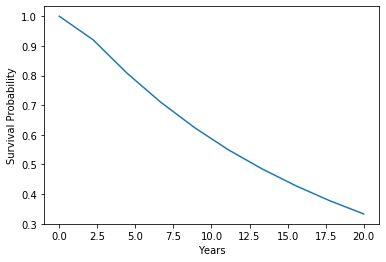

In [18]:
plt.plot(times, survProbs)
plt.xlabel("Years")
plt.ylabel("Survival Probability")

Copyright (c) 2020 Dominic O'Kane